In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# SMOTE and Near Miss
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer
# from aif360.algorithms.preprocessing import Reweighing

plt.style.use("fivethirtyeight")

from IPython.display import display, HTML

import warnings
print('Ok')

Ok


In [2]:

data = pd.read_csv("""..\data\interim\data_100000-30percent.csv""")
data2 = data.drop(['customer'], axis=1)
# data2 = data2.drop(['tenure'], axis=1)
# data2 = data2.drop(['comeback_product'], axis=1)

data2['gender'] = data2['gender'].astype(int)
# data2['churn'] = data2['churn'].astype(object)
data2['is_senior'] = data2['is_senior'].astype(int)
data2['contract_period'] = data2['contract_period'].astype(object)

numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

data2 = pd.get_dummies(data2)

X_original = data2.drop('churn', axis=1)
y_original = data2['churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
print(len(data2.keys()))
data2.keys()

Numerical: Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage'],
      dtype='object')

Categorical: Index(['contract_period', 'race', 't_location'], dtype='object')
46


Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 'contract_period_1', 'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36'],
      dtype='object')

In [3]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression(max_iter=1000)))

models.append(('XGBClassifier', XGBClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

methods = ['original', 'adasyn', 'smote', 'rus', 'ros']

In [4]:
# AIF360 Dataset Preparation

all_labels = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']

features = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']


class TMDataset(StandardDataset):
    def __init__(self, 
             label_name='churn',
             favorable_classes=[1.0],
                 
             protected_attribute_names=[
                'gender', 
#                 'is_senior',
#                 'race_O',
             ],
    
             privileged_classes=[
                [1.0,], 
#                 [0.0,],
#                 [0.0,],
             ],
                 
             instance_weights_name=None,
             categorical_features=[],
             features_to_keep=features, 
             features_to_drop=[],
             custom_preprocessing=None,
             metadata=None,
             csv_file_name='',
             data_frame=None,
    ):
        
        if data_frame is not None:
            aif_df = data_frame
        else:
            aif_df = pd.read_csv(csv_file_name)
        
        #df.reset_index(drop=True, inplace=True)
        # Preprocessing
        
        super().__init__(
            df=aif_df, label_name=label_name,
            favorable_classes=favorable_classes,
            protected_attribute_names=protected_attribute_names,
            privileged_classes=privileged_classes,
            instance_weights_name=instance_weights_name,
            categorical_features=categorical_features,
            features_to_keep=features_to_keep,
            features_to_drop=features_to_drop,
            custom_preprocessing=custom_preprocessing, 
            metadata=metadata,
     
        )

In [5]:
def make_sampling(method_name, X, y):
    if method_name == 'original':
        return (X, y)
    elif method_name == 'adasyn':
        adasyn = ADASYN(sampling_strategy='minority', random_state=420, n_neighbors=5)
        return adasyn.fit_sample(X, y)
    elif method_name == 'smote':
        os = SMOTE(random_state=41)
        return os.fit_sample(X, y)
    elif method_name == 'ros':
        random_over_sampler = RandomOverSampler(random_state=42)
        return random_over_sampler.fit_resample(X, y)
    elif method_name == 'rus':
        random_under_sampler = RandomUnderSampler(random_state=42)
        return random_under_sampler.fit_resample(X, y)
    else:
        print('UNKNOWN METHOD !!') 


Charn values Original
0    70000
1    30000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    46896
1    20104
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    23104
1     9896
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8059
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26818
           1       0.49      0.78      0.60      6182

    accuracy                           0.80     33000
   macro avg       0.71      0.79      0.73     33000
weighted avg       0.86      0.80      0.82     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20349
0    12651
Name: gender, dtype: int64


              counter
churn gender         
0     0         10556
      1         16262
1     0          2095
      1          4087
# # # # # # # # # # 
[[21736  1368]
 [ 5082  4814]]


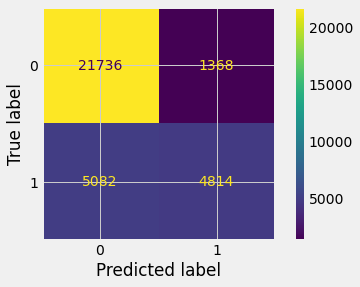




ROC AUC Score 0.815364365666785
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.03524569303360883

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.824513186312477

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 6182.0, 'FP': 0.0, 'TN': 26818.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.035246,6182.0,26818.0,[0.9032969696969746],0.824513,[0.9032969696969746],-0.035246


Charn values Original
1    75293
0    70000
Name: churn, dtype: int64
Total data: 145293

Charn values Train
1    50376
0    46970
Name: churn, dtype: int64
Total data: 97346

Charn values Test
1    24917
0    23030
Name: churn, dtype: int64
Total data: 47947


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8495137891859919
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     25618
           1       0.81      0.91      0.86     22329

    accuracy                           0.86     47947
   macro avg       0.86      0.86      0.86     47947
weighted avg       0.86      0.86      0.86     47947


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    26460
0    21487
Name: gender, dtype: int64


              counter
churn gender         
0     0         10096
      1         15522
1     0         11391
      1         10938
# # # # # # # # # # 
[[20917  2113]
 [ 4701 20216]]


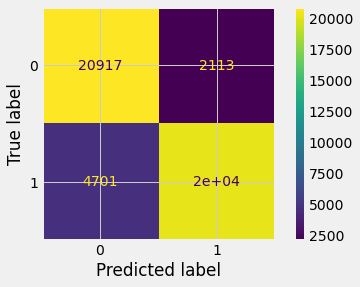




ROC AUC Score 0.9245025407932277
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.11675581512293409

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2824427562765437

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 22329.0, 'FP': 0.0, 'TN': 25618.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.116756,22329.0,25618.0,[0.6916595407428752],1.282443,[0.6916595407428752],0.116756


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8482428571428571
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     25915
           1       0.79      0.90      0.84     20285

    accuracy                           0.85     46200
   macro avg       0.85      0.86      0.85     46200
weighted avg       0.86      0.85      0.85     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    25900
0    20300
Name: gender, dtype: int64


              counter
churn gender         
0     0         10213
      1         15702
1     0         10087
      1         10198
# # # # # # # # # # 
[[21146  1977]
 [ 4769 18308]]


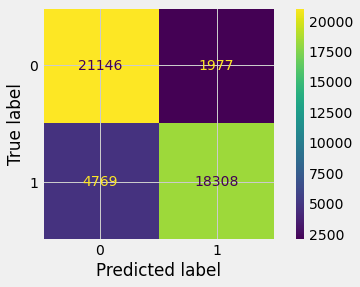




ROC AUC Score 0.918427147819496
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.10315137797896418

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2619749646651472

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 20285.0, 'FP': 0.0, 'TN': 25915.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.103151,20285.0,25915.0,[0.7562640692640636],1.261975,[0.7562640692640636],0.103151


Charn values Original
1    30000
0    30000
Name: churn, dtype: int64
Total data: 60000

Charn values Train
0    20167
1    20033
Name: churn, dtype: int64
Total data: 40200

Charn values Test
1    9967
0    9833
Name: churn, dtype: int64
Total data: 19800


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.74015
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     10974
           1       0.69      0.78      0.73      8826

    accuracy                           0.75     19800
   macro avg       0.75      0.75      0.74     19800
weighted avg       0.75      0.75      0.75     19800


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    12284
0     7516
Name: gender, dtype: int64


              counter
churn gender         
0     0          4370
      1          6604
1     0          3146
      1          5680
# # # # # # # # # # 
[[7880 1953]
 [3094 6873]]


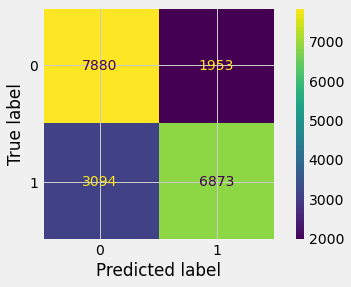




ROC AUC Score 0.8229958874455541
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.043816391524413634

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9052393391750181

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 8826.0, 'FP': 0.0, 'TN': 10974.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.043816,8826.0,10974.0,[0.7565757575757728],0.905239,[0.7565757575757728],-0.043816


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9215500000000001
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22632
           1       0.90      0.88      0.89     23568

    accuracy                           0.89     46200
   macro avg       0.89      0.89      0.89     46200
weighted avg       0.89      0.89      0.89     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    28703
0    17497
Name: gender, dtype: int64


              counter
churn gender         
0     0          9082
      1         13550
1     0          8415
      1         15153
# # # # # # # # # # 
[[20312  2811]
 [ 2320 20757]]


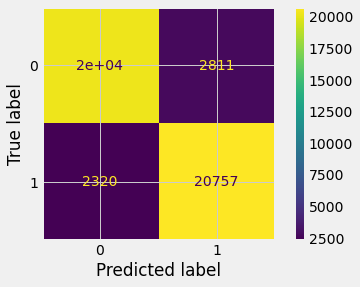




ROC AUC Score 0.9493940719429248
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.0469843207487029

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9110017185738785

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 23568.0, 'FP': 0.0, 'TN': 22632.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.046984,23568.0,22632.0,[0.7360389610389498],0.911002,[0.7360389610389498],-0.046984


Charn values Original
0    70000
1    30000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    46896
1    20104
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    23104
1     9896
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.80791
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     26995
           1       0.48      0.80      0.60      6005

    accuracy                           0.81     33000
   macro avg       0.72      0.80      0.74     33000
weighted avg       0.86      0.81      0.82     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20349
0    12651
Name: gender, dtype: int64


              counter
churn gender         
0     0         10637
      1         16358
1     0          2014
      1          3991
# # # # # # # # # # 
[[21884  1220]
 [ 5111  4785]]


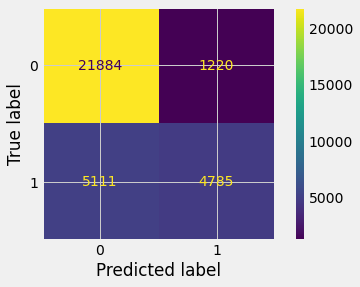




ROC AUC Score 0.8261998888159854
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.036930672405835224

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8117007635213378

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 6005.0, 'FP': 0.0, 'TN': 26995.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.036931,6005.0,26995.0,[0.9145515151515174],0.811701,[0.9145515151515174],-0.036931


Charn values Original
1    75293
0    70000
Name: churn, dtype: int64
Total data: 145293

Charn values Train
1    50376
0    46970
Name: churn, dtype: int64
Total data: 97346

Charn values Test
1    24917
0    23030
Name: churn, dtype: int64
Total data: 47947


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8525769577677831
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26621
           1       0.80      0.93      0.86     21326

    accuracy                           0.86     47947
   macro avg       0.87      0.87      0.86     47947
weighted avg       0.88      0.86      0.86     47947


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    26460
0    21487
Name: gender, dtype: int64


              counter
churn gender         
0     0         10556
      1         16065
1     0         10931
      1         10395
# # # # # # # # # # 
[[21579  1451]
 [ 5042 19875]]


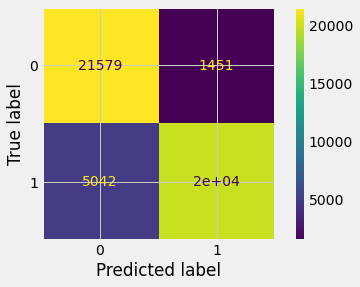




ROC AUC Score 0.9290903106171804
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.11586906368634858

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2949394348379781

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 21326.0, 'FP': 0.0, 'TN': 26621.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.115869,21326.0,26621.0,[0.693532442071426],1.294939,[0.693532442071426],0.115869


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8504071428571429
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26663
           1       0.78      0.92      0.85     19537

    accuracy                           0.86     46200
   macro avg       0.86      0.87      0.86     46200
weighted avg       0.87      0.86      0.86     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    25900
0    20300
Name: gender, dtype: int64


              counter
churn gender         
0     0         10525
      1         16138
1     0          9775
      1          9762
# # # # # # # # # # 
[[21657  1466]
 [ 5006 18071]]


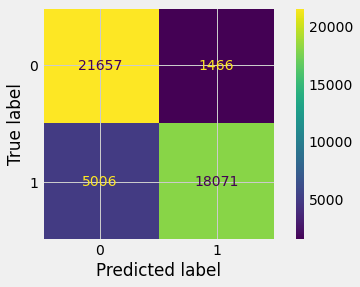




ROC AUC Score 0.9237708676276475
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.10461589668486221

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2775611272421565

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 19537.0, 'FP': 0.0, 'TN': 26663.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.104616,19537.0,26663.0,[0.7621298701298693],1.277561,[0.7621298701298693],0.104616


Charn values Original
1    30000
0    30000
Name: churn, dtype: int64
Total data: 60000

Charn values Train
0    20167
1    20033
Name: churn, dtype: int64
Total data: 40200

Charn values Test
1    9967
0    9833
Name: churn, dtype: int64
Total data: 19800


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.74455
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     10959
           1       0.70      0.79      0.74      8841

    accuracy                           0.75     19800
   macro avg       0.75      0.76      0.75     19800
weighted avg       0.76      0.75      0.75     19800


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    12284
0     7516
Name: gender, dtype: int64


              counter
churn gender         
0     0          4438
      1          6521
1     0          3078
      1          5763
# # # # # # # # # # 
[[7957 1876]
 [3002 6965]]


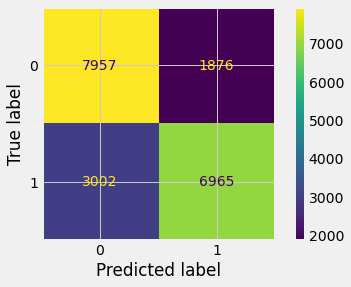




ROC AUC Score 0.8308802501932774
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.059620513901181005

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8729171624566879

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 8841.0, 'FP': 0.0, 'TN': 10959.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.059621,8841.0,10959.0,[0.759202020202036],0.872917,[0.759202020202036],-0.059621


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7532428571428571
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     25268
           1       0.71      0.78      0.74     20932

    accuracy                           0.76     46200
   macro avg       0.76      0.76      0.76     46200
weighted avg       0.76      0.76      0.76     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    28703
0    17497
Name: gender, dtype: int64


              counter
churn gender         
0     0         10174
      1         15094
1     0          7323
      1         13609
# # # # # # # # # # 
[[18579  4544]
 [ 6689 16388]]


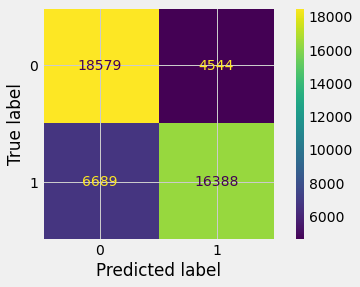




ROC AUC Score 0.8380907588875985
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.055602733205097676

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8827272208695776

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 20932.0, 'FP': 0.0, 'TN': 25268.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.055603,20932.0,25268.0,[0.7819783549783585],0.882727,[0.7819783549783585],-0.055603


Charn values Original
0    70000
1    30000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    46896
1    20104
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    23104
1     9896
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.80407
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     27468
           1       0.45      0.81      0.58      5532

    accuracy                           0.80     33000
   macro avg       0.70      0.81      0.73     33000
weighted avg       0.87      0.80      0.82     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20349
0    12651
Name: gender, dtype: int64


              counter
churn gender         
0     0         10742
      1         16726
1     0          1909
      1          3623
# # # # # # # # # # 
[[22057  1047]
 [ 5411  4485]]


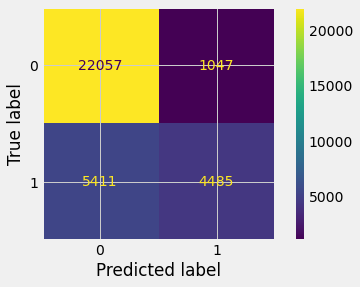




ROC AUC Score 0.817892821405638
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.027145984803733064

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8475314256772939

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 5532.0, 'FP': 0.0, 'TN': 27468.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.027146,5532.0,27468.0,[0.9351333333333315],0.847531,[0.9351333333333315],-0.027146


Charn values Original
1    75293
0    70000
Name: churn, dtype: int64
Total data: 145293

Charn values Train
1    50376
0    46970
Name: churn, dtype: int64
Total data: 97346

Charn values Test
1    24917
0    23030
Name: churn, dtype: int64
Total data: 47947


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8207232969805697
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     25221
           1       0.80      0.88      0.84     22726

    accuracy                           0.84     47947
   macro avg       0.84      0.84      0.84     47947
weighted avg       0.84      0.84      0.84     47947


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    26460
0    21487
Name: gender, dtype: int64


              counter
churn gender         
0     0          9928
      1         15293
1     0         11559
      1         11167
# # # # # # # # # # 
[[20235  2795]
 [ 4986 19931]]


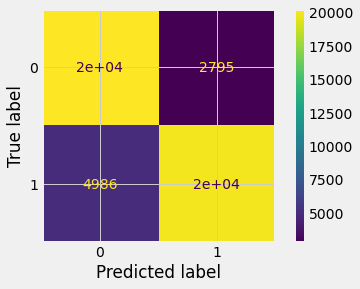




ROC AUC Score 0.9089752899295658
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.11591992324561523

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2746701145409671

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 22726.0, 'FP': 0.0, 'TN': 25221.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.11592,22726.0,25221.0,[0.6921809497987095],1.27467,[0.6921809497987095],0.11592


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8236928571428571
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     26967
           1       0.75      0.90      0.82     19233

    accuracy                           0.83     46200
   macro avg       0.83      0.84      0.83     46200
weighted avg       0.84      0.83      0.83     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    25900
0    20300
Name: gender, dtype: int64


              counter
churn gender         
0     0         10633
      1         16334
1     0          9667
      1          9566
# # # # # # # # # # 
[[21144  1979]
 [ 5823 17254]]


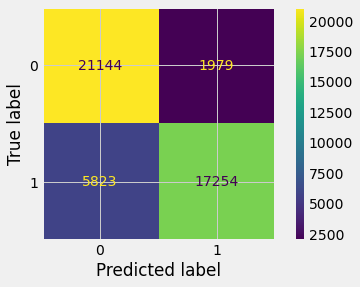




ROC AUC Score 0.9039814428256279
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1068632672080948

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2893329103794329

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 19233.0, 'FP': 0.0, 'TN': 26967.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.106863,19233.0,26967.0,[0.7826363636363702],1.289333,[0.7826363636363702],0.106863


Charn values Original
1    30000
0    30000
Name: churn, dtype: int64
Total data: 60000

Charn values Train
0    20167
1    20033
Name: churn, dtype: int64
Total data: 40200

Charn values Test
1    9967
0    9833
Name: churn, dtype: int64
Total data: 19800


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7409166666666668
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     11118
           1       0.69      0.79      0.73      8682

    accuracy                           0.75     19800
   macro avg       0.75      0.75      0.75     19800
weighted avg       0.76      0.75      0.75     19800


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    12284
0     7516
Name: gender, dtype: int64


              counter
churn gender         
0     0          4429
      1          6689
1     0          3087
      1          5595
# # # # # # # # # # 
[[7985 1848]
 [3133 6834]]


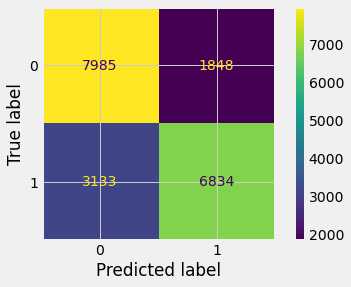




ROC AUC Score 0.8240711228983848
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.04474674152213476

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9017571094087751

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 8682.0, 'FP': 0.0, 'TN': 11118.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.044747,8682.0,11118.0,[0.7678585858586011],0.901757,[0.7678585858586011],-0.044747


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7396357142857143
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     25648
           1       0.69      0.77      0.73     20552

    accuracy                           0.74     46200
   macro avg       0.74      0.75      0.74     46200
weighted avg       0.75      0.74      0.75     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    28703
0    17497
Name: gender, dtype: int64


              counter
churn gender         
0     0         10162
      1         15486
1     0          7335
      1         13217
# # # # # # # # # # 
[[18493  4630]
 [ 7155 15922]]


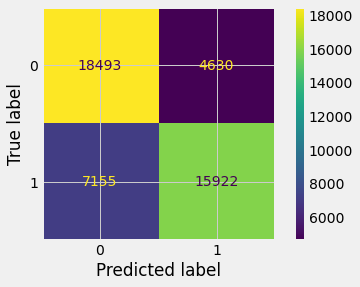




ROC AUC Score 0.8224656951413067
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.041259792335212764

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.910397229371445

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 20552.0, 'FP': 0.0, 'TN': 25648.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.04126,20552.0,25648.0,[0.7908961038961114],0.910397,[0.7908961038961114],-0.04126


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Charn values Original
0    70000
1    30000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    46896
1    20104
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    23104
1     9896
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.70238
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     31106
           1       0.15      0.81      0.26      1894

    accuracy                           0.74     33000
   macro avg       0.57      0.77      0.55     33000
weighted avg       0.94      0.74      0.81     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20349
0    12651
Name: gender, dtype: int64


              counter
churn gender         
0     0         11906
      1         19200
1     0           745
      1          1149
# # # # # # # # # # 
[[22740   364]
 [ 8366  1530]]


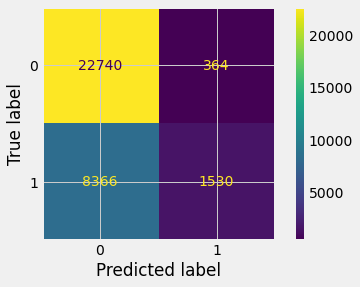




ROC AUC Score 0.6753710061439525
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.002423934265492575

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.04292831885858

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1894.0, 'FP': 0.0, 'TN': 31106.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.002424,1894.0,31106.0,[0.9886363636363636],1.042928,[0.9886363636363636],0.002424


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Charn values Original
1    75293
0    70000
Name: churn, dtype: int64
Total data: 145293

Charn values Train
1    50376
0    46970
Name: churn, dtype: int64
Total data: 97346

Charn values Test
1    24917
0    23030
Name: churn, dtype: int64
Total data: 47947


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.557148843495343
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     22832
           1       0.61      0.61      0.61     25115

    accuracy                           0.59     47947
   macro avg       0.59      0.59      0.59     47947
weighted avg       0.59      0.59      0.59     47947


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    26460
0    21487
Name: gender, dtype: int64


              counter
churn gender         
0     0          9772
      1         13060
1     0         11715
      1         13400
# # # # # # # # # # 
[[13201  9829]
 [ 9631 15286]]


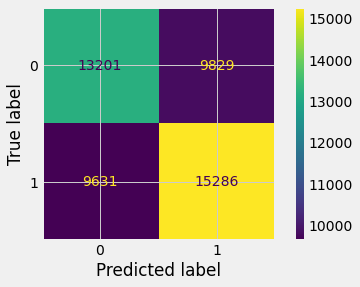




ROC AUC Score 0.6132485653498577
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.03878859269826562

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.0765929972235901

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25115.0, 'FP': 0.0, 'TN': 22832.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.038789,25115.0,22832.0,[0.8853275491688878],1.076593,[0.8853275491688878],0.038789


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6425142857142857
              precision    recall  f1-score   support

           0       0.73      0.63      0.68     26742
           1       0.58      0.68      0.63     19458

    accuracy                           0.66     46200
   macro avg       0.66      0.66      0.65     46200
weighted avg       0.67      0.66      0.66     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    25900
0    20300
Name: gender, dtype: int64


              counter
churn gender         
0     0         11216
      1         15526
1     0          9084
      1         10374
# # # # # # # # # # 
[[16970  6153]
 [ 9772 13305]]


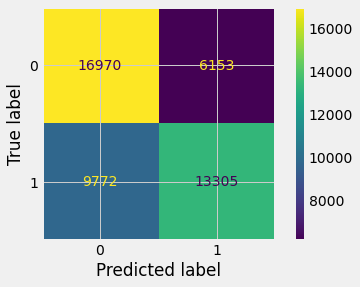




ROC AUC Score 0.678685504440756
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.04694714418852347

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.1172094692965835

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 19458.0, 'FP': 0.0, 'TN': 26742.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.046947,19458.0,26742.0,[0.9285194805194832],1.117209,[0.9285194805194832],0.046947


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Charn values Original
1    30000
0    30000
Name: churn, dtype: int64
Total data: 60000

Charn values Train
0    20167
1    20033
Name: churn, dtype: int64
Total data: 40200

Charn values Test
1    9967
0    9833
Name: churn, dtype: int64
Total data: 19800


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6393333333333333
              precision    recall  f1-score   support

           0       0.65      0.63      0.64     10258
           1       0.61      0.64      0.63      9542

    accuracy                           0.63     19800
   macro avg       0.63      0.63      0.63     19800
weighted avg       0.63      0.63      0.63     19800


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    12284
0     7516
Name: gender, dtype: int64


              counter
churn gender         
0     0          3755
      1          6503
1     0          3761
      1          5781
# # # # # # # # # # 
[[6414 3419]
 [3844 6123]]


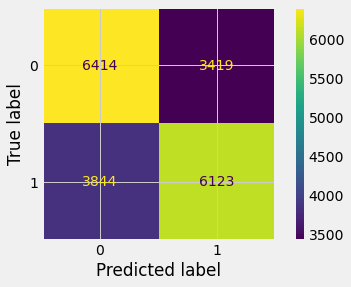




ROC AUC Score 0.6791666235993608
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.02978697003973202

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.0632940909821949

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 9542.0, 'FP': 0.0, 'TN': 10258.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.029787,9542.0,10258.0,[0.8268787878787932],1.063294,[0.8268787878787932],0.029787


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6466785714285714


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.63      0.71     29832
           1       0.53      0.74      0.61     16368

    accuracy                           0.67     46200
   macro avg       0.67      0.69      0.66     46200
weighted avg       0.71      0.67      0.68     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    28703
0    17497
Name: gender, dtype: int64


              counter
churn gender         
0     0         11169
      1         18663
1     0          6328
      1         10040
# # # # # # # # # # 
[[18880  4243]
 [10952 12125]]


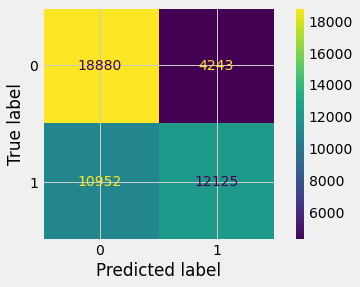




ROC AUC Score 0.6972675940378876
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.01187277856090524

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.033942665640803

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 16368.0, 'FP': 0.0, 'TN': 29832.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.011873,16368.0,29832.0,[0.9590303030303018],1.033943,[0.9590303030303018],0.011873


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

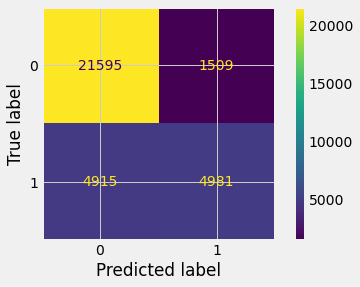




ROC AUC Score 0.8221319525173998
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.03666549887764184

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8260013440622356

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 6490.0, 'FP': 0.0, 'TN': 26510.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.036665,6490.0,26510.0,[0.8945878787878847],0.826001,[0.8945878787878847],-0.036665


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

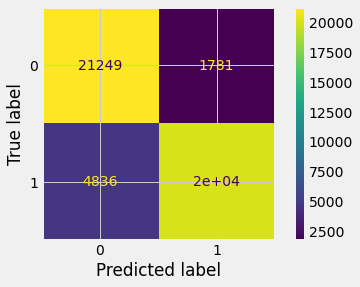




ROC AUC Score 0.926765544194655
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.11610490915053806

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2874378645324884

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 21862.0, 'FP': 0.0, 'TN': 26085.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.116105,21862.0,26085.0,[0.690337247377284],1.287438,[0.690337247377284],0.116105


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

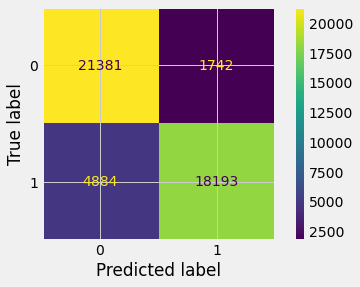




ROC AUC Score 0.9208435788801808
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.10515377446411928

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.272921410824801

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 19935.0, 'FP': 0.0, 'TN': 26265.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.105154,19935.0,26265.0,[0.7548874458874425],1.272921,[0.7548874458874425],0.105154


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

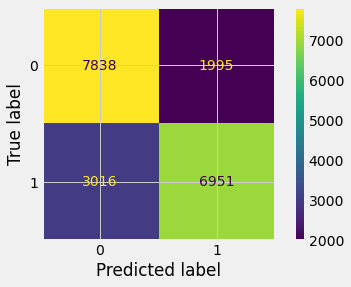




ROC AUC Score 0.8264394999175098
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.058088776722759194

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8774158163095046

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 8946.0, 'FP': 0.0, 'TN': 10854.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.058089,8946.0,10854.0,[0.7527070707070876],0.877416,[0.7527070707070876],-0.058089


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

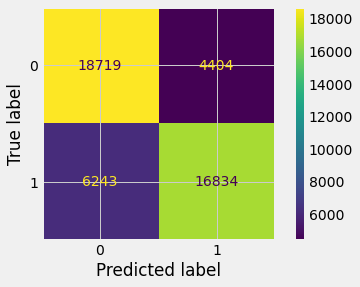




ROC AUC Score 0.8529815346924381
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05697242565705107

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8816215771221705

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 21238.0, 'FP': 0.0, 'TN': 24962.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.056972,21238.0,24962.0,[0.7727229437229441],0.881622,[0.7727229437229441],-0.056972


Charn values Original
0    70000
1    30000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    46896
1    20104
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    23104
1     9896
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.72086
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     22576
           1       0.55      0.53      0.54     10424

    accuracy                           0.72     33000
   macro avg       0.67      0.67      0.67     33000
weighted avg       0.71      0.72      0.71     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20349
0    12651
Name: gender, dtype: int64


              counter
churn gender         
0     0          8880
      1         13696
1     0          3771
      1          6653
# # # # # # # # # # 
[[18167  4937]
 [ 4409  5487]]


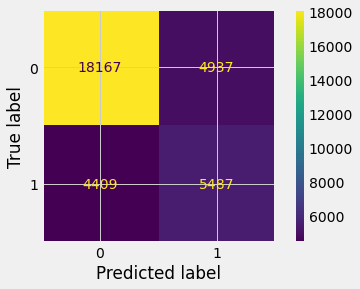




ROC AUC Score 0.6703902546315477
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.028865609787882995

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9117110636444264

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 10424.0, 'FP': 0.0, 'TN': 22576.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.028866,10424.0,22576.0,[0.7400181818182089],0.911711,[0.7400181818182089],-0.028866


Charn values Original
1    75293
0    70000
Name: churn, dtype: int64
Total data: 145293

Charn values Train
1    50376
0    46970
Name: churn, dtype: int64
Total data: 97346

Charn values Test
1    24917
0    23030
Name: churn, dtype: int64
Total data: 47947


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7859728074524706
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     22620
           1       0.80      0.79      0.80     25327

    accuracy                           0.79     47947
   macro avg       0.79      0.79      0.79     47947
weighted avg       0.79      0.79      0.79     47947


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    26460
0    21487
Name: gender, dtype: int64


              counter
churn gender         
0     0          8987
      1         13633
1     0         12500
      1         12827
# # # # # # # # # # 
[[17759  5271]
 [ 4861 20056]]


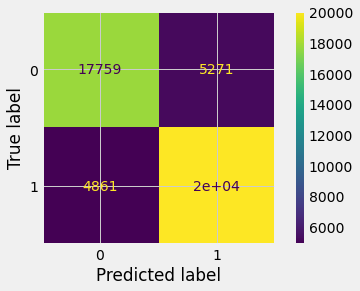




ROC AUC Score 0.7880184644631117
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.09697763955853561

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2000489859451822

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25327.0, 'FP': 0.0, 'TN': 22620.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.096978,25327.0,22620.0,[0.6579097753769436],1.200049,[0.6579097753769436],0.096978


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7822071428571429
              precision    recall  f1-score   support

           0       0.78      0.79      0.79     22737
           1       0.79      0.78      0.79     23463

    accuracy                           0.79     46200
   macro avg       0.79      0.79      0.79     46200
weighted avg       0.79      0.79      0.79     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    25900
0    20300
Name: gender, dtype: int64


              counter
churn gender         
0     0          8943
      1         13794
1     0         11357
      1         12106
# # # # # # # # # # 
[[18002  5121]
 [ 4735 18342]]


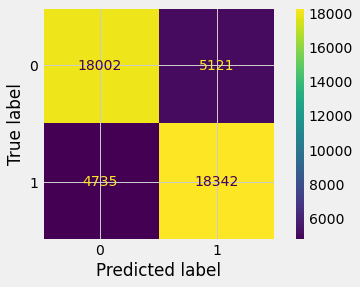




ROC AUC Score 0.7867085102767974
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.09204500066569038

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.1969242951628434

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 23463.0, 'FP': 0.0, 'TN': 22737.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.092045,23463.0,22737.0,[0.7014891774891532],1.196924,[0.7014891774891532],0.092045


Charn values Original
1    30000
0    30000
Name: churn, dtype: int64
Total data: 60000

Charn values Train
0    20167
1    20033
Name: churn, dtype: int64
Total data: 40200

Charn values Test
1    9967
0    9833
Name: churn, dtype: int64
Total data: 19800


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6608166666666666
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      9855
           1       0.66      0.66      0.66      9945

    accuracy                           0.66     19800
   macro avg       0.66      0.66      0.66     19800
weighted avg       0.66      0.66      0.66     19800


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    12284
0     7516
Name: gender, dtype: int64


              counter
churn gender         
0     0          3873
      1          5982
1     0          3643
      1          6302
# # # # # # # # # # 
[[6493 3340]
 [3362 6605]]


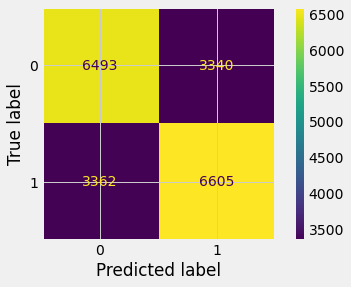




ROC AUC Score 0.6615071676938657
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.02832576512340801

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9447867821682094

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 9945.0, 'FP': 0.0, 'TN': 9855.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.028326,9945.0,9855.0,[0.6879292929293219],0.944787,[0.6879292929293219],-0.028326


Charn values Original
1    70000
0    70000
Name: churn, dtype: int64
Total data: 140000

Charn values Train
1    46923
0    46877
Name: churn, dtype: int64
Total data: 93800

Charn values Test
0    23123
1    23077
Name: churn, dtype: int64
Total data: 46200


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8655999999999999
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     19951
           1       0.90      0.79      0.84     26249

    accuracy                           0.83     46200
   macro avg       0.83      0.84      0.83     46200
weighted avg       0.84      0.83      0.83     46200


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    28703
0    17497
Name: gender, dtype: int64


              counter
churn gender         
0     0          7921
      1         12030
1     0          9576
      1         16673
# # # # # # # # # # 
[[17593  5530]
 [ 2358 20719]]


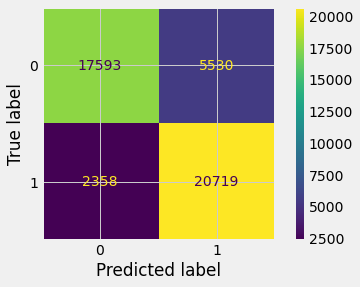




ROC AUC Score 0.8293218974743423
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.03358622558378421

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9421804454548457

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26249.0, 'FP': 0.0, 'TN': 19951.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.033586,26249.0,19951.0,[0.7049307359307162],0.94218,[0.7049307359307162],-0.033586


In [6]:
for name, model in models:
    display(HTML(f'<h2> {name} </h2>'))
    for method in methods:
        display(HTML(f'<h3>{method} </h3>'))
        X, y = make_sampling(method, X_original, y_original)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
        score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
        
        print('Charn values Original')
        print(y.value_counts())
        print('Total data: {}'.format(y.count()))
        
        print('\nCharn values Train')
        print(y_train.value_counts())
        print('Total data: {}'.format(y_train.count()))
        
        print('\nCharn values Test')
        print(y_test.value_counts())
        print('Total data: {}'.format(y_test.count()))
        
        print("\n")
        print("*_" * 20)
        print(f"Mean scores : {score.mean()}")

        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        print(metrics.classification_report(y_pred_test, y_test))
        
        pred_df = X_test.copy()
        pred_df['churn'] = y_pred_test
        
        print('\n Gender Count in predited value with X_test set')
        print('# ' * 10)
        print(pred_df.gender.value_counts())
        p_df = pred_df[['churn', 'gender']]
        print('\n')
        p_df.insert(2, 'counter', 1)
        print(p_df.groupby(['churn','gender',]).sum())
        print('# ' * 10)
        
        print(metrics.confusion_matrix(y_test, y_pred_test))
        metrics.plot_confusion_matrix(model, X_test, y_test)
        plt.show()

        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc_score = metrics.roc_auc_score(y_test, y_proba)
        print('\n\n')
        print(f'ROC AUC Score {roc_auc_score}')
        

        # Additional matrix
        df_pred = X_test
        df_pred.reset_index(drop=True, inplace=True)
        
        pred = pd.Series(y_pred_test)
        df_pred = df_pred.assign(churn=pred)
        
        # df_pred = df_pred.assign(churn=y_test)
        
        aif_df = TMDataset(data_frame=df_pred)
        aif_df_labeled = aif_df.copy()
        aif_df_labeled.labels = y_pred_test
        
        result_tbl_cols = [
            'Attribute',
            'Mean difference', 
            'Positive Outcome',
            'Negative', 
            'Differences', 
            'Disparate impact', 
            'Consistency',
            'Statistical parity dif',
        ]

        result_rows = []
        for p_attribute in aif_df.protected_attribute_names:
            result_row = []
            privileged_groups = [{p_attribute: 1}]
            print(' * ' * 10)
            print(privileged_groups)
            unprivileged_groups = [{p_attribute: 0}]
            
            metric_orig_train = BinaryLabelDatasetMetric(
                aif_df,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            clsf_metric = ClassificationMetric(
                aif_df, aif_df_labeled, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            print('\n AIF 360 ')
            print('\n Statistical parity difference', clsf_metric.statistical_parity_difference())
           
            print('\n True possitve rate {} \t True negative rate {} '.format(
                clsf_metric.true_positive_rate(), clsf_metric.true_negative_rate()))
            
            print('\n Desparate impact ', clsf_metric.disparate_impact())
            print('\n Equal opportunity difference ', clsf_metric.equal_opportunity_difference())
            print('\n Average odds difference ', clsf_metric.average_odds_difference())
            print('\n Theil Index ', clsf_metric.theil_index())
            print('\n Binary Confusion Matric ')
            print(clsf_metric.binary_confusion_matrix())
            print('\n ..........................')

            text_expl = MetricTextExplainer(metric_orig_train)
            
            result_row.append(p_attribute)
            result_row.append(metric_orig_train.mean_difference())
            result_row.append(metric_orig_train.num_positives())
            result_row.append(metric_orig_train.num_negatives())

            # this is to shutup the warning msg from sklearn
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', FutureWarning)
                result_row.append(metric_orig_train.consistency())
                
            result_row.append(metric_orig_train.disparate_impact())
            result_row.append(metric_orig_train.consistency())
            result_row.append(metric_orig_train.statistical_parity_difference())

            result_rows.append(result_row)

        result_df = pd.DataFrame(result_rows, columns=result_tbl_cols)
        display(result_df)
        # End Aif matrix

In [7]:
# pred_df.group_by(['churn'])
print(pred_df.gender.value_counts())
p_df = pred_df[['churn', 'gender']]
p_df.insert(2, 'counter', 1)
p_df.groupby(['churn','gender',]).sum()

1    28703
0    17497
Name: gender, dtype: int64


counter
churn gender         
0     0          7921
      1         12030
1     0          9576
      1         16673